In [1]:
### Basic Sentiment Analysis

Import the relevant modules:

In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
# from tqdm import tqdm as prog_bar
import pandas as pd
import numpy as np
import tweepy
import re
import matplotlib.pyplot as plt
from tokens import api_keys
plt.style.use('fivethirtyeight')

In [3]:
# twitter authentication code, to connect to the API
authentication = tweepy.OAuthHandler(api_keys["consumer_key"], api_keys["consumer_secret"])
# set tokens
authentication.set_access_token(api_keys["access_token"], api_keys["access_secret"])
# create API object
api = tweepy.API(authentication, wait_on_rate_limit=True)

Extract data

In [4]:
tweets = api.user_timeline(screen_name="Nigel_Farage", count=15700, lang="en", tweet_mode="extended")

# test to see if the API is working

print("Showing last 10 tweets")
i = 1
for each_tweet in tweets[:10]:
    print(f"{str(i)}: {each_tweet.full_text}\n")
    i += 1

Showing last 10 tweets
1: Biden let's the cat out of the bag. Under him lawlessness and violence would be out of control. https://t.co/9pBob7NtcM

2: More arrivals by boat yesterday. Migration Watch UK predicts the number of people arriving in the UK by illegal Channel crossing is on course to reach 7,500 by the end of this year. https://t.co/qYmKdR0jzj

3: The WHO is another corrupt, globalist organisation. https://t.co/ZDahM7Xs7r

4: This clip taken today shows just how hazardous these migrant crossings are, across some of the busiest shipping lanes in the world. https://t.co/QDudjReEkz

5: Good luck! https://t.co/h214tLJebk

6: BLM aim to destroy our history, culture, religion and pave the way for a Marxist takeover. When will the media wake up? https://t.co/DHV6ktNstR

7: Today I went for my first proper pint in 103 days. Those who didn't should cheer up a bit! https://t.co/545r69HdSe

8: To all those screaming and shouting about me going to the pub.... I have been back from the US

In [5]:
data_frame = pd.DataFrame([each_tweet.full_text for each_tweet in tweets], columns=["Tweets"])
# preview first 5 elements
data_frame.head()

,Tweets
0,Biden let's the cat out of the bag. Under him ...
1,More arrivals by boat yesterday. Migration Wat...
2,"The WHO is another corrupt, globalist organisa..."
3,This clip taken today shows just how hazardous...
4,Good luck! https://t.co/h214tLJebk


Looking closely at the data frame, there's some unnecessary characters that would hinder the sentiment analysis process, such as twitter mentions (using @johndoe), retweets, and so forth. The following function should clear that up

In [6]:
def clean_up_tweets(tweet):
    # Remove hyperlink
    tweet = re.sub('https?:\/\/\S+', '', tweet)
    # Remove hashtags
    tweet = re.sub('#', '', tweet)
    # Remove mentions
    tweet = re.sub('@[A-Za-z0-9]+', '', tweet)
    # Remove retweet tags
    tweet = re.sub('RT[\s]+', '', tweet)
    
    return tweet

# Clean the tweets with the function above
data_frame["Tweets"] = data_frame["Tweets"].apply(clean_up_tweets)
data_frame

,Tweets
0,Biden let's the cat out of the bag. Under him ...
1,More arrivals by boat yesterday. Migration Wat...
2,"The WHO is another corrupt, globalist organisa..."
3,This clip taken today shows just how hazardous...
4,Good luck!
...,...
195,Only Her Majesty can make VE day real to the n...
196,: How will this WWII hero Royal Marine be toas...
197,On a day of national celebration we are being ...
198,Large numbers or illegal migrants coming into ...


#### Subjectivity and Polarity

For clarification, subjectivity is a measure of how opinionated a text is and polarity is a measure of positivity.

In [7]:
def get_tweet_polarity(tweet):
    # TextBlob does the grunt work with this
    return TextBlob(tweet).sentiment.polarity

def get_tweet_subjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Now we've got functions to get the subjectivity and polarity, we can add them to the data frame
data_frame["Subjectivity"] = data_frame["Tweets"].apply(get_tweet_subjectivity)
data_frame["Polarity"] = data_frame["Tweets"].apply(get_tweet_polarity)
# Check updated data frame
data_frame

,Tweets,Subjectivity,Polarity
0,Biden let's the cat out of the bag. Under him ...,0.000000,0.000000
1,More arrivals by boat yesterday. Migration Wat...,0.500000,0.000000
2,"The WHO is another corrupt, globalist organisa...",1.000000,-0.500000
3,This clip taken today shows just how hazardous...,0.900000,0.600000
4,Good luck!,0.600000,0.875000
...,...,...,...
195,Only Her Majesty can make VE day real to the n...,0.650000,0.100000
196,: How will this WWII hero Royal Marine be toas...,0.000000,0.000000
197,On a day of national celebration we are being ...,0.500000,0.166667
198,Large numbers or illegal migrants coming into ...,0.325893,-0.102679


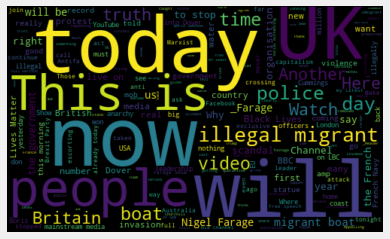

In [8]:
# word cloud visualization
allWords = ' '.join([each_tweet for each_tweet in data_frame['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Numerical scores are easy to interpret if you know how polarity is measured
# A simple function will class the tweets as positive or negative

def classify_tweet(polarity_score):
    if polarity_score == 0:
        return "Neutral"
    elif polarity_score > 0:
        return "Positive"
    else:
        return "Negative"

data_frame["Analysis"] = data_frame["Polarity"].apply(classify_tweet)

# Show data frame with new column
data_frame

,Tweets,Subjectivity,Polarity,Analysis
0,Biden let's the cat out of the bag. Under him ...,0.000000,0.000000,Neutral
1,More arrivals by boat yesterday. Migration Wat...,0.500000,0.000000,Neutral
2,"The WHO is another corrupt, globalist organisa...",1.000000,-0.500000,Negative
3,This clip taken today shows just how hazardous...,0.900000,0.600000,Positive
4,Good luck!,0.600000,0.875000,Positive
...,...,...,...,...
195,Only Her Majesty can make VE day real to the n...,0.650000,0.100000,Positive
196,: How will this WWII hero Royal Marine be toas...,0.000000,0.000000,Neutral
197,On a day of national celebration we are being ...,0.500000,0.166667,Positive
198,Large numbers or illegal migrants coming into ...,0.325893,-0.102679,Negative


Now to be honest, I did this project mainly because Nigel Farage is indeed, a negative racist man, so whilst I could show the positive tweets I'm only really interested in what he's got to say in regards to recent affairs.

In [10]:
print('Printing negative tweets:\n')
j=1
sorted_dataframe = data_frame.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sorted_dataframe.shape[0]):
    if sorted_dataframe['Analysis'][i] == 'Negative':
        print(str(j) + ') ' + sorted_dataframe['Tweets'][i])
        print()
        j=j+1

Printing negative tweets:

1) The WHO is another corrupt, globalist organisation. 

2) BLM aim to destroy our history, culture, religion and pave the way for a Marxist takeover. When will the media wake up? 

3) To all those screaming and shouting about me going to the pub.... I have been back from the USA for 2 weeks and I have been tested — the result was negative. Sorry to disappoint you. Cheers! 

4) : Number of high-profile organisations are forced to distance themselves from Black Lives Matter as they say organisation has…

5) Heartily agree with _Starmer’s condemnation of the Black Lives Matter organisation. 

6) Horrible tragedy in a Glasgow Hotel housing illegal immigrants. 

All over the UK, hotels are filling up with young men who are coming across the Channel every day. 

It is a massive risk to our wellbeing — yet the government does nothing.

7) : Former Detective Chief Superintendent: 'false narrative' by mainstream media caused Brixton  via …

8) Here are illegal migran

Using a scatter plot, we can see the subjectivity and polarity 

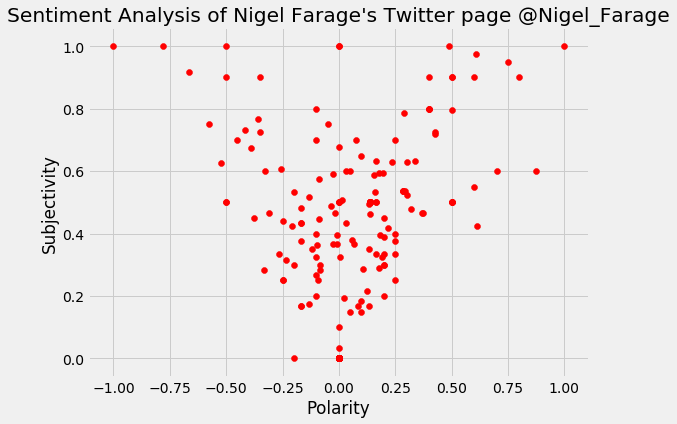

In [12]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, data_frame.shape[0]):
    plt.scatter(data_frame["Polarity"][i], data_frame["Subjectivity"][i], color='Red')
    
plt.title('Sentiment Analysis of Nigel Farage\'s Twitter page @Nigel_Farage') 
plt.xlabel('Polarity (measure of positivity)') 
plt.ylabel('Subjectivity (measure of opinionatedness)') 
plt.show()